In [1]:
import pandas as pd
import numpy as np

In [2]:
sco_books = pd.read_csv('SCoData_books_v1.2_2022_01.csv', encoding='utf-8', dtype={'year': 'Int32'})
sco_books.sample(5)

,uri,title,author,editor,translator,introduction,illustrator,photographer,year,format,uncertain,ebook_url,volumes_issues,notes,event_count,borrow_count,purchase_count,circulation_years,updated
477,https://shakespeareandco.princeton.edu/books/s...,The Quintessence of Ibsenism,"Shaw, George Bernard",NaN,NaN,NaN,NaN,NaN,1891,Book,False,https://archive.org/details/quintessenceibs00s...,NaN,NaN,2,2,0,1936;1923,2020-06-07T22:48:14+00:00
2205,https://shakespeareandco.princeton.edu/books/r...,"Icarus: Or, the Future of Science","Russell, Bertrand",NaN,NaN,NaN,NaN,NaN,1924,Book,False,https://archive.org/details/icarusorfutureof00...,NaN,NaN,1,1,0,1924,2021-07-11T20:29:03+00:00
4773,https://shakespeareandco.princeton.edu/books/c...,Found Floating: An Inspector French Detective ...,"Crofts, Freeman Wills",NaN,NaN,NaN,NaN,NaN,1937,Book,False,NaN,NaN,NaN,7,7,0,1937;1938;1939,2020-04-30T19:40:14+00:00
3374,https://shakespeareandco.princeton.edu/books/v...,The Scarab Murder Case: A Philo Vance Story,"Van Dine, S. S.",NaN,NaN,NaN,NaN,NaN,1929,Book,False,NaN,NaN,NaN,6,6,0,1936;1937;1931;1932,2020-06-29T03:40:17+00:00
5990,https://shakespeareandco.princeton.edu/books/w...,Walt Whitman: A Study,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,Book,True,NaN,NaN,Unidentified. Either John Burroughs's *Whitman...,1,1,0,1922,2020-06-03T02:55:34+00:00


In [3]:
ban_books = pd.read_csv('banned_books.csv', encoding='utf-8', dtype={'date_banned': 'Int32'})
ban_books.sample(5)

,title,author,country,date_banned,source,note
11,On the Origin of Species,"Darwin, Charles",USA,1925,https://babel.hathitrust.org/cgi/pt?id=mdp.390...,NaN
9,Lord Walter's Wife,"Browning, Elizabeth Barrett",England,1857,https://babel.hathitrust.org/cgi/pt?id=mdp.390...,NaN
191,Journeyman,"Caldwell, Erskine Preston",NaN,<NA>,NaN,NaN
165,I'll Never Be Young Again,"Du Maurier, Daphne",Ireland,1942,https://sites.nd.edu/irish-hesburgh/censorship/,NaN
150,Maggie: A Girl of the Streets,"Crane, Stephen",USA,1893,https://books.google.at/books?id=gDqsCQAAQBAJ&...,NaN


In [4]:
ban_books.columns

Index(['title', 'author', 'country', 'date_banned', 'source', 'note'], dtype='object')

In [5]:
ban_books.shape

(208, 6)

In [6]:
ban_books_aut = ban_books[['author']]
ban_books_aut.rename(columns={'author':'ban_author'}, inplace=True)
ban_books_aut

C:\Users\dittm\AppData\Local\Temp\ipykernel_6660\3768331347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ban_books_aut.rename(columns={'author':'ban_author'}, inplace=True)


,ban_author
0,Aristophanes
1,Ovid
2,"Apuleius, Lucius"
3,"Shakespeare, William"
4,"Defoe, Daniel"
...,...
203,"Bowman, Isa"
204,"Romanov, Panteleimon"
205,"Lofting, Hugh"
206,"Faulkner, William"


In [7]:
ban_books_aut_unique = ban_books_aut.drop_duplicates()
ban_books_aut_unique.sample(10)

,ban_author
22,"Twain, Mark"
2,"Apuleius, Lucius"
49,"Trotsky, Leon"
197,Calder Willingham
69,"O'Neill, Eugene"
167,"Isherwood, Christopher"
136,"Colette, Sidonie-Gabrielle"
111,"Robbins, Harold"
71,"Huxley, Aldous"
21,"Tolstoy, Leo"


In [8]:
ban_books_aut_unique.shape

(137, 1)

In [9]:
sco_books_aut = sco_books[sco_books['format'] == 'Book'][['author', 'title', 'format']].dropna()
sco_books_aut.rename(columns={'author':'sco_author'}, inplace=True)
sco_books_aut.shape

(5278, 3)

In [10]:
sco_books_aut_unique = sco_books_aut.drop_duplicates(subset=['sco_author'])
sco_books_aut_unique.sample(7)
sco_books_aut_unique.shape

(1995, 3)

In [11]:
sco_books_aut_unique.sample(10)

,sco_author,title,format
4439,"Breuer, Bessie",Memory of Love,Book
122,"Ruskin, John",Modern Painters,Book
3960,"Masterman, J. C.",An Oxford Tragedy,Book
1095,"Strachey, Giles Lytton",Landmarks in French Literature,Book
2529,"Brandon, John G.",Young Love,Book
4512,"Steen, Marguerite",The One-Eyed Moon,Book
4178,"Engle, Paul",American Song: A Book of Poems,Book
1527,"Bradby, M. K.",Psycho-Analysis and Its Place in Life,Book
675,"Roosevelt, Theodore",The Strenuous Life: Essays and Addresses,Book
584,"Maugham, W. Somerset",Liza of Lambeth,Book


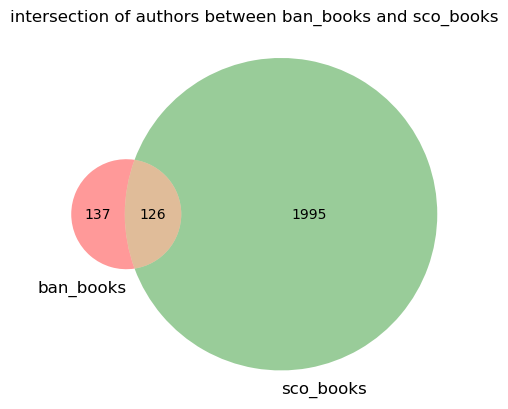

In [12]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

ban_unique_authors = len(set(ban_books_aut_unique['ban_author']))
sco_unique_authors = len(set(sco_books_aut_unique['sco_author']))

intersection_authors = len(set(ban_books_aut_unique['ban_author']).intersection(set(sco_books_aut_unique['sco_author'])))

venn2(subsets=(ban_unique_authors, sco_unique_authors, intersection_authors),
      set_labels=('ban_books', 'sco_books'))

plt.title('intersection of authors between ban_books and sco_books')
plt.show()

In [13]:
ban_books_aut_unique.rename(columns={'author': 'ban_author'}, inplace=True)

sco_books_aut_unique.rename(columns={'author': 'sco_author'}, inplace=True)

merged_df = pd.merge(ban_books_aut_unique, sco_books_aut_unique, how='outer', left_on='ban_author', right_on='sco_author')

no_intersection_df = merged_df[merged_df['ban_author'].isna() | merged_df['sco_author'].isna()]

no_intersection_df.reset_index(drop=True, inplace=True) # to avoid confusion later on
no_intersection_df = no_intersection_df[['sco_author','ban_author']]

print(no_intersection_df)


                      sco_author           ban_author
0                            NaN                 Ovid
1                            NaN     Apuleius, Lucius
2                            NaN  Gingrich, Arnold W.
3                            NaN   Dennett, Mary Ware
4                            NaN      Robbins, Harold
...                          ...                  ...
1875                 Kyd, Thomas                  NaN
1876                 Polo, Marco                  NaN
1877               Nashe, Thomas                  NaN
1878             Myers, F. W. H.                  NaN
1879  Brontë, Emily;Brontë, Anne                  NaN

[1880 rows x 2 columns]


C:\Users\dittm\AppData\Local\Temp\ipykernel_6660\887306475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ban_books_aut_unique.rename(columns={'author': 'ban_author'}, inplace=True)
C:\Users\dittm\AppData\Local\Temp\ipykernel_6660\887306475.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sco_books_aut_unique.rename(columns={'author': 'sco_author'}, inplace=True)


In [14]:
no_intersection_df.sample(7)

,sco_author,ban_author
1599,"Adamic, Louis",NaN
67,"Bunyan, John;Southey, Robert",NaN
597,"Ashford, Daisy",NaN
68,"Hugo, Victor",NaN
1783,"Turner, John Victor",NaN
375,"Brooks, Van Wyck",NaN
1019,"Asch, Nathan",NaN
